# Initilization

In [8]:
import sklearn

import pandas as pd

import matplotlib.pyplot as plt

import torch

import numpy as np

import seaborn as sns

from torch import nn

from sklearn.model_selection import train_test_split

from scipy.stats import zscore

from scipy.linalg import svd # Singular value decomposition package

In [7]:
filename_data = "Data/Abalone/abalone.data" # path to our data

data_frame = pd.read_csv(filename_data,header = None) # our dataframe without the header

data_frame = data_frame.replace("M","A") # changing the male adult to just adult

data_frame = data_frame.replace("F","A") # changing the female adult to just adult

sex_data = list(data_frame.iloc[:,0]) # we extract all the sex_data

class_labels = sex_data # our class labels is precisely our sex_data

class_names = sorted(set(class_labels)) # we make a list of class names

class_dict = dict(zip(class_names, range(3))) # we assign a value to each of our class_names

class_data = np.asarray([class_dict[value] for value in class_labels]) # we give our data the appropriate value

# Our attribute name

attribute_name = ["Sex", "Length (mm)", "Diameter (mm)", "height (mm)", "Whole weight (g)", "Shucked weight (g)", "Viscera weight (g)", "Shell weight (g)", "Rings"]

data_frame.columns = attribute_name # our data_frame gets assigned the attribute name

data_frame.iloc[:,1:8] = data_frame.iloc[:,1:8]*200 # the original source divided the continouous values by 200 - we scale them back up



,Sex,Length (mm),Diameter (mm),height (mm),Whole weight (g),Shucked weight (g),Viscera weight (g),Shell weight (g),Rings
0,A,91.0,73.0,19.0,102.8,44.9,20.2,30.0,15
1,A,70.0,53.0,18.0,45.1,19.9,9.7,14.0,7
2,A,106.0,84.0,27.0,135.4,51.3,28.3,42.0,9
3,A,88.0,73.0,25.0,103.2,43.1,22.8,31.0,10
4,I,66.0,51.0,16.0,41.0,17.9,7.9,11.0,7
5,I,85.0,60.0,19.0,70.3,28.2,15.5,24.0,8
6,A,106.0,83.0,30.0,155.5,47.4,28.3,66.0,20
7,A,109.0,85.0,25.0,153.6,58.8,29.9,52.0,16
8,A,95.0,74.0,25.0,101.9,43.3,22.5,33.0,9
9,A,110.0,88.0,30.0,178.9,62.9,30.2,64.0,19


We will now standardize our data by using scipy's zscore function

In [11]:
# we will make our sub_data, which is just our data_frame without the class labels

sub_data = data_frame.iloc[:,1:]

standardized_data = zscore(sub_data, ddof = 1) # ddof = degree of freedom

standardized_data

# to do it manually - you can do it this way

# manual way

#mean_list = list(sub_data.mean())

#Y = sub_data - np.ones((N,len(mean_list))) * mean_list

#Y_manual_standardized = Y.astype(np.float64)

#Y_manual_standardized = Y_manual_standardized * 1 / np.std(Y_manual_standardized, axis = 0)


,Length (mm),Diameter (mm),height (mm),Whole weight (g),Shucked weight (g),Viscera weight (g),Shell weight (g),Rings
0,-0.574489,-0.432097,-1.064297,-0.641821,-0.607613,-0.726125,-0.638140,1.571355
1,-1.448812,-1.439757,-1.183837,-1.230130,-1.170770,-1.205077,-1.212842,-0.909904
2,0.050027,0.122116,-0.107978,-0.309432,-0.463444,-0.356647,-0.207114,-0.289589
3,-0.699393,-0.432097,-0.347058,-0.637743,-0.648160,-0.607527,-0.602222,0.020568
4,-1.615350,-1.540523,-1.422916,-1.271933,-1.215822,-1.287183,-1.320599,-0.909904
...,...,...,...,...,...,...,...,...
4172,0.341468,0.424414,0.609261,0.118799,0.047902,0.532836,0.073053,0.330726
4173,0.549640,0.323648,-0.107978,0.279896,0.358765,0.309325,0.155666,0.020568
4174,0.632909,0.676328,1.565580,0.708127,0.748470,0.975296,0.496895,-0.289589
4175,0.841081,0.777094,0.250642,0.541933,0.773248,0.733540,0.410690,0.020568


# Simple data visualization

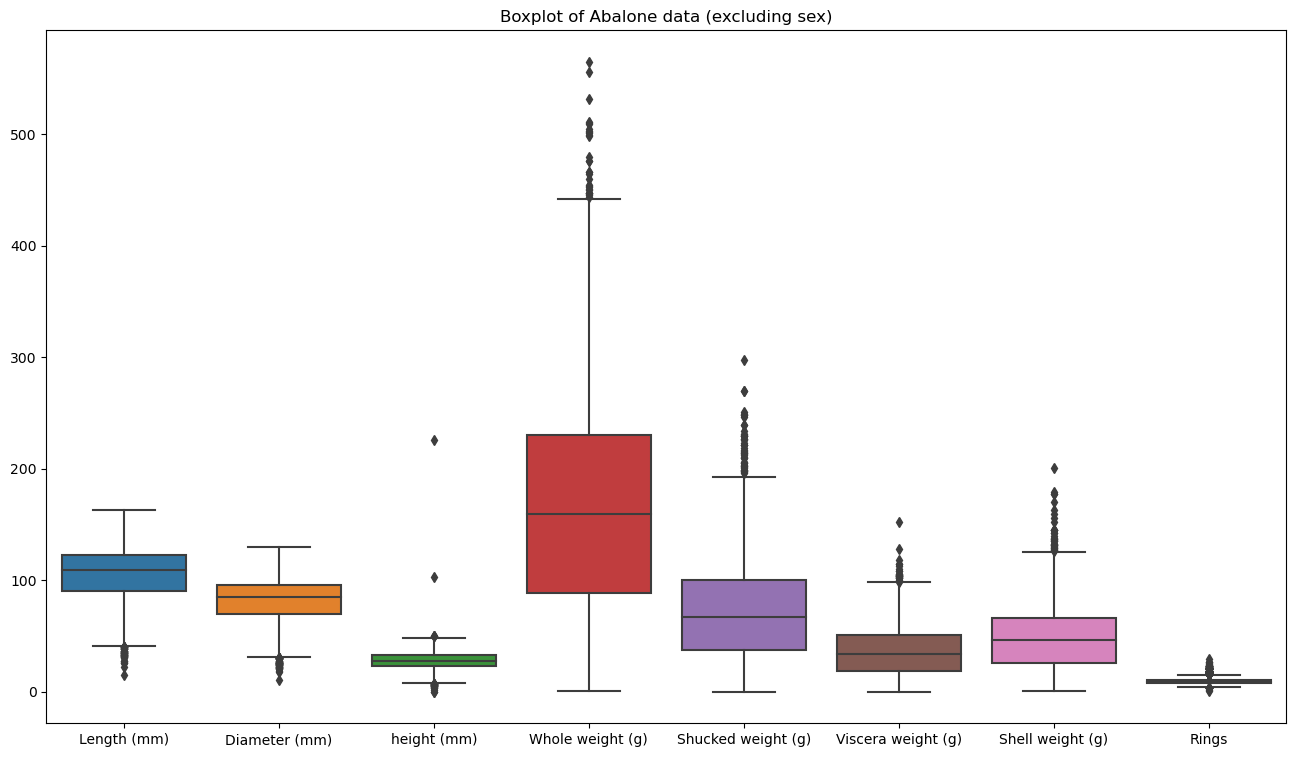

In [28]:
## Boxplot ## 

plt.figure(figsize= (16,9))
sns.boxplot(data=sub_data).set(title='Boxplot of Abalone data (excluding sex)')
plt.show()

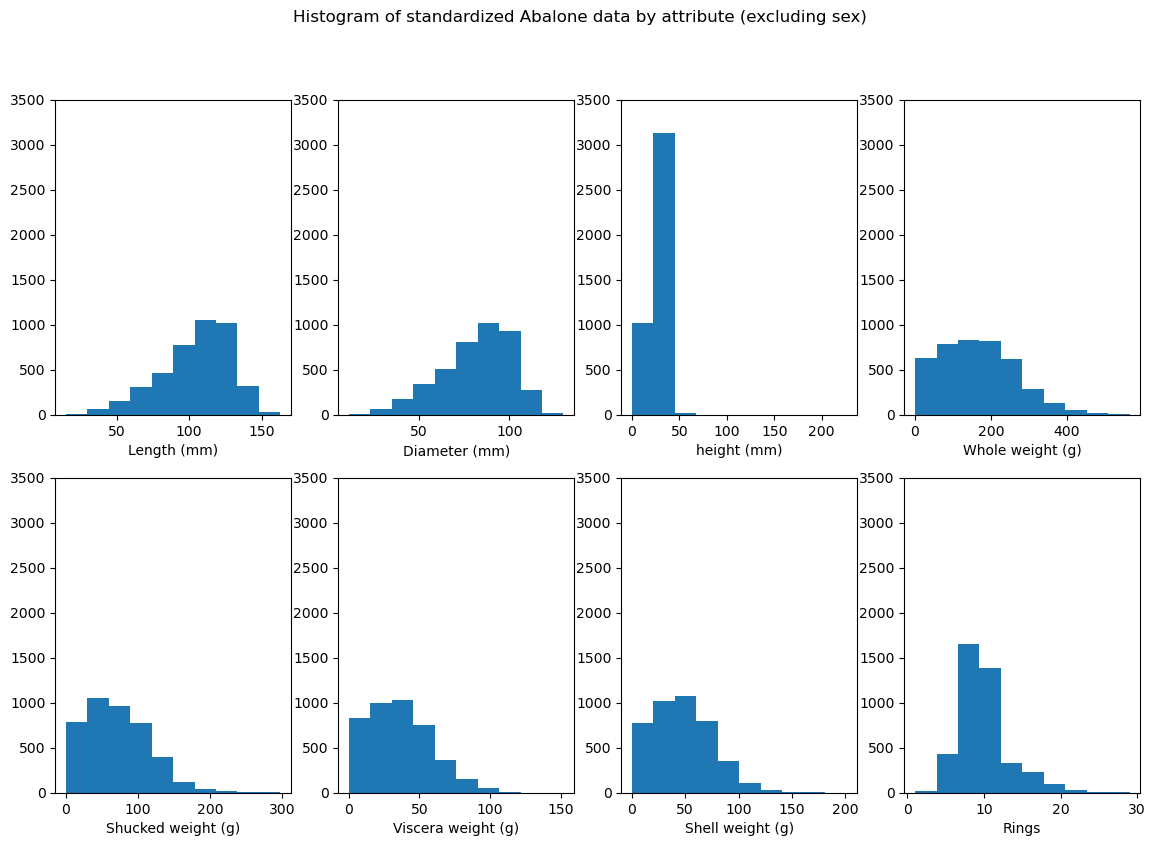

In [32]:
plt.figure(figsize=(14,9))
u = int(np.floor(np.sqrt(M))); v = int(np.ceil(float(M)/u))
for i in range(M):
    plt.subplot(u,v,i+1)
    plt.hist(sub_data.iloc[:,i])
    plt.xlabel(attribute_name[i+1])
    plt.ylim(0,3500)
plt.suptitle("Histogram of Abalone data by attribute (excluding sex)")
plt.show()

# PCA analysis

To reduce the dimensionality of our data, a PCA analysis has been used - using scipy's svd function

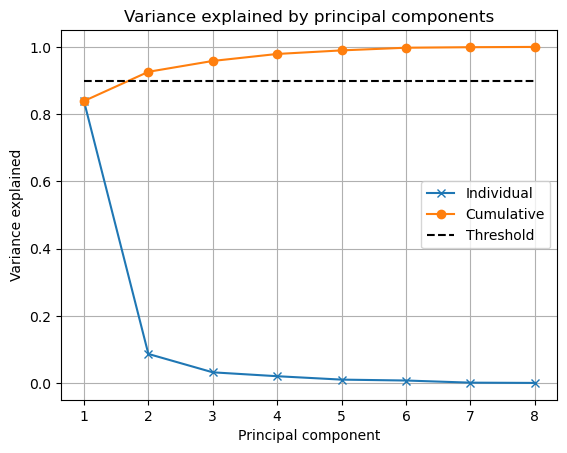

In [18]:
U,S,V = svd(standardized_data,full_matrices=False)

# Compute variance explained by principal components

rho = (S*S) / (S*S).sum() # The way to compute the individual rho

threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()


We will compute our transformed data and do some training and testing based on these - this is due to the fact that most of our variance can be explained with the first 2 PCs

In [26]:
Vh = V.T

# Projecting the data onto the PC space

Z = standardized_data @ Vh

PCA_data_2 = Z.iloc[:,0:2].to_numpy() # PCA_data of the first 2 data

N = len(class_data) # number of values we have in our data

M = len(attribute_name)-1 # number of attribute names

C = len(class_names) # number of class names

X_train, X_test, y_train, y_test = train_test_split(PCA_data_2, class_data, test_size=0.95, stratify=class_data) # lower test_size -> larger error rate in this case

X_train = torch.Tensor(X_train)

X_test = torch.Tensor(X_test)

y_train = torch.unsqueeze(torch.Tensor(y_train),1)

y_test = torch.unsqueeze(torch.Tensor(y_test),1)
